

# **Práctico N°5**           **Aprendizaje No Supervisado**

"Ciencia de datos aplicada al estudio de la Obesidad y otras enfermedades crónicas en Córdoba."

Integrantes: 
- Basmadjian, Osvaldo Martin
- Fernandez, María Emilia
- Romero, Fernando

## Objetivo y alcance




En los prácticos anteriores han podido conocer el dataset, curarlo y revisar bibliografía con respecto a la temática para poder seleccionar las mejores variables predictoras según los problemas presentados. Se han tratado problemas de clasificación binarios, y se usaron diferentes algoritmos y técnicas en cada paso. Este último práctico, tiene por objetivo profundizar en técnicas de análisis exploratorio de los datos, para representar mejor features que son díficiles de tomar en cuenta y trabajaremos con algoritmos no supervisados. Esto nos permitirá, experimentar con técnicas de clustering, para evaluar el comportamiento de las asociaciones.

Si bien se pueden utilizar los algoritmos no supervisados como un primer acercamiento del dataset, en este caso es lo último que trabajaremos en esta mentoría.
A veces puede ocurrir que conocemos demasiado nuestro problema o, por el contrario, no tenemos mucha idea, y utilizar técnicas no supervisadas puede ayudarnos a encontrar patrones entre las distintas observaciones (personas) y generar conocimientos muy valiosos que quizás no tuvimos en cuenta.



### **La necesidad es la siguiente:**

1.   Poder agrupar a las personas de acuerdo a sus características más influyentes.


### **Para ello se debe:**

*   Analizar y justificar que subconjunto de features se utilizará para lograr la mejor segmentación/agrupación.
*   Analizar distintas soluciones de clustering.
Es importante variar parámetros:
    -   Probar distintos números de clusters.
    -   Variar las métricas de distancia

*   Finalmente, comentar las conclusiones.

## NOTA: 
Para evaluar las posibles técnicas de clustering realizadas se pueden utilizar los siguientes métodos analíticos:
- Medir lo desbalanceados que quedan los clusters (un cluster muy grande y muchos muy pequeños, a veces es una mala agrupación)
- Observar las instancias más cercanas a los centroides de cada clusters (uno esperaria que fueran las instancias más características de ese cluster)


### Se evaluarán los siguientes aspectos:
   ***1-*** Que se apliquen los conceptos vistos con los profes en el teórico y en el práctico.

  ***2-*** Que el entregable no sea solo la notebook. El informe debe tener un mensaje claro y debe presentarse en un formato legible para cualquier tipo de stakeholder.

  ***3-*** Capacidad de análisis.

  ***4-*** Criterio para elegir que solución aplicar en cada caso y con qué método implementarla.

#### Deadline tentativo para la entrega: 20/10 (deseable)

Actividad opcional (no obligatoria)

 Proyectar el dataset a algún embedding (Ej: Reduciendo dimensionalidad con PCA) y ver que sucede en ese espacio. 
* Apoyarse en las clases/etiquetas "IMC2 o HTA" originales para inspeccionar el contenido de los clusters.



## Inicialización del entorno

In [1]:
from sklearn                  import preprocessing
from sklearn.model_selection  import GridSearchCV, RandomizedSearchCV
# from google.colab             import files
from sklearn.preprocessing    import StandardScaler
from math                     import isnan
import seaborn             as sns
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd

In [2]:
# encuestas = files.upload()

## Preparación del set de datos para el análisis de clustering

In [3]:
df = pd.read_csv('cured_data_obesity_new.csv')

In [4]:
# generamos una copia previamente del set de datos
# eliminamos las primeras 4 y últimas 5 columnas que corresponden a datos de identificación
df_clust = df.copy().dropna()
df_clust = df_clust.iloc[:, 4:-5]

In [5]:
# Combinamos las variables frecuencia y recordatorio que están relacionadas

var_combinar  = [['Af','Ar'], ['Df','Dr'], ['Ef','Er'], ['Cf','Cr'], ['B1f','B1r'],
                 ['B2f','B2r'], ['niacinaf','niacinar'], ['Caf','Car'], ['Fef','Fer'],
                 ['Naf','Nar'], ['Kf','Kr'], ['acúrf', 'acúrr']
                 ]

for i in var_combinar:
  df_clust[i[0]] = np.mean(df_clust[i], axis=1)

In [6]:
# Dividimos las variables en categóricas, discretas y numéricas, dado que en las siguientes
# celdas vamos a tratarlas de forma diferenciada

# Dado que existe una variante numérica, no tendremos en cuenta las siguientes variables categóricas:
# ['hta', 'HTA', 'fve1', 'fgl1', 'fpr1', 'fgr1', 'clasifIMC', 'cat_cintura','fgs1', 'fgins1', 
# 'fgp1', 'fgm1', 'fcol1', 'falc1' 
             
                    
var_cat =   ['ecar'     , 'dlp'         , 'ec'            , 'ic'            , 
             'tecar'    , 'fuma'        , 'antepa'        , 'antema'        , 
             'anteher'  , 'dbt'         , 'tipo1'         , 'tipo2'         ,
             'tratadbt' , 'antepad'     , 'antemad'       , 'anteher'       , 
             'antehij'  , 'charla'      , 'prog'          , 'cancer'        ,
             'tummal'   , 'tumben'      , 'ubic_tumor'    , 'tratinst'      , 
             'actfis'   , 'act_fis_tipo', 'act_fis_veces' , 'sexo'          , 
             'eciv'     , 'edulc'        
             ]  

# Dado que existe una variante numérica, no tendremos en cuenta las siguientes variables discretas:
# ['flact', 'fque','fhue', 'fcar', 'fcab', 'fcac', 'fvis', 'ffiem', 'fvega', 'fvegb', 'fvegc'  , 
# 'ffrua', 'ffrub', 'ffrus', 'ffrud', 'fcere', 'fleg', 'fpan', 'fgal', 'fpast', 'fdulc', 'fgol', 
# 'fazuc', 'fedulc', 'faceite', 'fmant', 'fader', 'fhel', 'fagua', 'fjugo', 'fgas', 'falco', 'fcpre', 
# 'fcrap', 'fsnac', 'ftor',]

var_discr = ['cant'   , 'dbt_duracion'  , 'edad'  , 'nhijos'   , 'talla' , 'cc'      , 'salt'      ,
             'estof'  , 'fritos'        , 'te'    , 'mate'     ,  'café' , 'nes'     , 'nivel_edu' , 
             'stress' , 'act_fis_carga' , 'durac' , 'grupoedad', 'imagen_percibida'  
             ]

# var_discr = ['cant'   , 'tiempo'  , 'edad'  , 'nhijos'  , 'talla' , 'cc'      , 'salt'      ,
#              'estof'  , 'fritos'        , 'te'    , 'mate'    ,  'café' , 'nes'     , 'eent' , 
#              'stress' , 'carga' , 'durac' ,'perc'  
#              ]

# No se tienen en cuenta las variables recordatorio porque se realizó el promedio con la frecuencia previamente
# ['Ar', 'Dr', 'Er', 'Cr', 'B1r', 'B2r', 'niacinar', 'Car', 'Fer', 'Nar', 'Kr', 'acúrr']

var_num =   ['ten1max'  , 'ten1min' , 'ten2max' , 'ten2min' , 'fve2'    , 'fgl2'    ,   
             'fpr2'     , 'fgr2'    , 'fgs2'    , 'fgins2'  , 'fgp2'    , 'fgm2'    , 'ffi2'    , 
             'ffs2'     , 'fsodio'  , 'falc2'   , 'lact'    , 'que'     , 'hue'     , 'car'     , 
             'cab'      , 'cac'     , 'vis'     , 'fiem'    , 'vega'    , 'fibvega' , 'vegb'    , 
             'fibvegb'  , 'vegc'    , 'fibvegc' , 'frua'    , 'fibfrua' , 'frub'    , 'fibfrub' , 
             'frus'     , 'fibfrus' , 'frud'    , 'fibfrud' , 'cere'    , 'fibcere' , 'leg'     , 
             'fibleg'   , 'pan'     , 'fibpan'  , 'gal'     , 'fibgal'  , 'past'    , 'fibpast' , 
             'dulc'     , 'fibdulc' , 'gol'     , 'azuc'    , 'aceite'  , 'mant'    , 'ader'    ,
             'fibader'  , 'hel'     , 'fibhel'  , 'agua'    , 'jugo'    , 'fibjugo' , 'gas'     , 
             'fibgas'   , 'alco'    , 'fibalco' , 'cpre'    , 'fibcpre' , 'crap'    , 'fibcrap' , 
             'snac'     , 'fibsnac' , 'tort'    , 'fibtor'  , 'Gcarhue' , 'Gcetu'   , 'Gceint'  , 
             'Gazmil'   , 'fcol2'   , 'Ghor'    , 'IMC'     , 'Ncomr'   , 'Af'      , 'Df'      ,
             'Ef'       , 'Cf'      , 'B1f'     , 'B2f'     , 'niacinaf', 'Caf'     , 'Fef'     ,
             'Naf'      , 'Kf'      , 'acúrf'   
             ]

var_all = var_cat + var_discr + var_num 

In [7]:
# Convertimos todos los valores de var_discr en int
df_clust[var_discr] = df_clust[var_discr].astype(int)

# Codificamos en números las variables categóricas
df_clust_nom = {}
for n, i in enumerate(var_cat):
  df_clust_nom[i] = df_clust[i]
  df_clust.drop(i, axis=1) 
  le = preprocessing.LabelEncoder()
  le.fit(df_clust[i])  
  df_clust[i] = le.transform(df_clust[i]) 
    
# Definimos df_clust con las variables seleccionadas
df_clust = df_clust[var_all]

#### Eliminación de características con poca varianza:
Visualizamos y eliminamos aquellas variables con una varianza menor a 1 (arbitrario)

In [8]:
from sklearn.feature_selection import VarianceThreshold

# Calculamos la varianza de las características
var_small = []
var_small_names = []
for index_list, var_list in enumerate([var_discr + var_num]):
    if index_list == 0:
        pass
    selector = VarianceThreshold()
    selector.fit_transform(df_clust[var_list])
    var = selector.variances_
    var_names = df_clust[var_list].columns
    for index, obj in enumerate(var):
        if obj < 1:
            p_var = var_list[index]
            var_small.append(obj)
            var_small_names.append(p_var) 
            var_all[index_list] = list(set(var_list) - set(var_small_names))
df_clust = df_clust.drop(var_small_names, axis=1) # eliminamos las features con poca varianza
print('se eliminaron ', len(var_small_names),' features: \n', var_small_names)

se eliminaron  18  features: 
 ['talla', 'act_fis_carga', 'imagen_percibida', 'fibfrub', 'fibfrus', 'fibfrud', 'fibgal', 'fibpast', 'fibdulc', 'fibader', 'fibhel', 'fibjugo', 'fibgas', 'fibalco', 'fibcpre', 'fibcrap', 'fibsnac', 'fibtor']


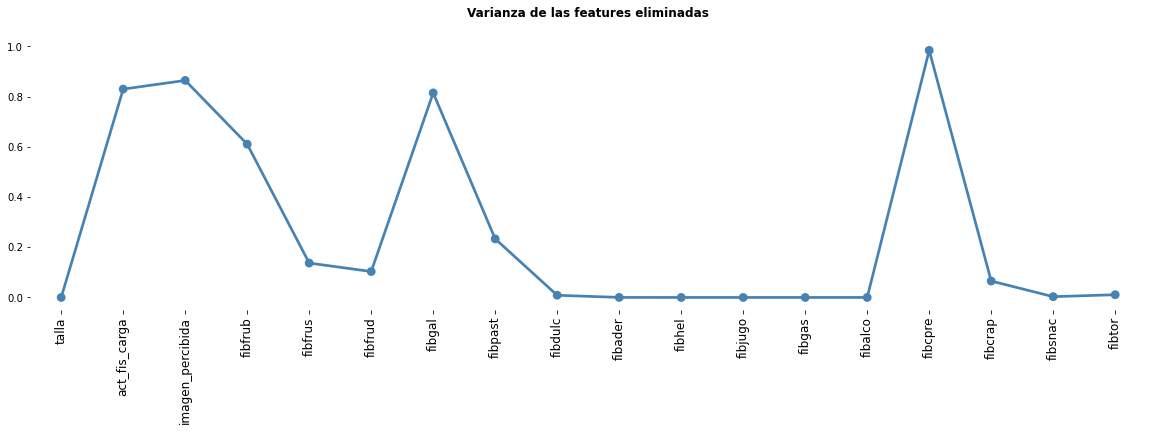

In [9]:
# Visualizamos la varianza de las características eliminadas

plt.figure(figsize=(20, 5))
sns.pointplot(y=var_small, 
              x=var_small_names, 
              color='steelblue')
plt.xticks(rotation=90, fontsize=12)
plt.title('Varianza de las features eliminadas\n', fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()

In [10]:
# estandarizamos la cantidad de nutrientes consumidos (variables a partir de la columna 52) 
# según las calorías consumidas
for col in df_clust.iloc[:, 52:].columns:
    df_clust[col] /= df_clust['fve2']

#### Estandarización variables

In [11]:
# Estandarizamos los datos
cols = df_clust.iloc[:, len(var_cat):].columns 
X = StandardScaler().fit_transform(df_clust[cols])
df_clust.drop(cols, axis=1)
df_clust.loc[:, cols] = X

#### Unificación de variables co-dependientes

In [12]:
# Visualización de la dependencia entre variables para eliminar variables redundantes
# tiempo de ejecución aproximado = 10 min
from sklearn.feature_selection import mutual_info_regression
dep_max = 1
v = df_clust.columns[30:] # seleccionamos las variables discretas y continuas
dep_var= {}
for index, obj in enumerate(v):
    data = df_clust[v].copy()
    m = mutual_info_regression(X=data, y=df_clust[obj])
    for i, o in enumerate(m):
        if o > dep_max and i != index:
            print('Dependencia entre: ', obj, ' y ', v[i], ' = ', round(o, 2))
            dep_var.update({obj: [obj, v[i]]})

Dependencia entre:  edad  y  grupoedad  =  1.92
Dependencia entre:  grupoedad  y  edad  =  1.91
Dependencia entre:  fve2  y  hue  =  1.53
Dependencia entre:  fve2  y  aceite  =  1.72
Dependencia entre:  fve2  y  agua  =  1.57
Dependencia entre:  fsodio  y  Naf  =  3.02
Dependencia entre:  falc2  y  alco  =  1.16
Dependencia entre:  hue  y  fve2  =  1.53
Dependencia entre:  vegb  y  fibvegb  =  1.18
Dependencia entre:  fibvegb  y  vegb  =  1.18
Dependencia entre:  vegc  y  fibvegc  =  1.72
Dependencia entre:  fibvegc  y  vegc  =  1.72
Dependencia entre:  frua  y  fibfrua  =  1.23
Dependencia entre:  fibfrua  y  frua  =  1.23
Dependencia entre:  leg  y  fibleg  =  1.35
Dependencia entre:  fibleg  y  leg  =  1.35
Dependencia entre:  pan  y  fibpan  =  2.03
Dependencia entre:  fibpan  y  pan  =  2.03
Dependencia entre:  azuc  y  Gazmil  =  3.92
Dependencia entre:  aceite  y  fve2  =  1.72
Dependencia entre:  agua  y  fve2  =  1.57
Dependencia entre:  alco  y  falc2  =  1.15
Dependencia ent

In [13]:
# A partir del análisis anterior, unificamos las variables con una dependencia
# superior a 1 (arbitrario). No se toma en cuenta la relación con "fve2" porque se utilizará 
# esta variable para estandarizar el consumo de alimentos

var_combinar  = [['edad', 'grupoedad'], ['Naf', 'fsodio']  , ['azuc', 'Gazmil']   , 
                 ['alco', 'falc2']    , ['vegb', 'fibvegb'], ['vegc', 'fibvegc']  ,
                 ['fibfrua', 'frua']  , ['leg', 'fibleg']  , ['pan', 'fibpan']    ,
                ]

for i in var_combinar:
    df_clust[i[0]] = np.mean(df_clust[i], axis=1)
    df_clust.drop([i[1]], axis=1, inplace=True)

## Visualización de la dispersión de los datos a partir de embeddings

#### Componentes principales

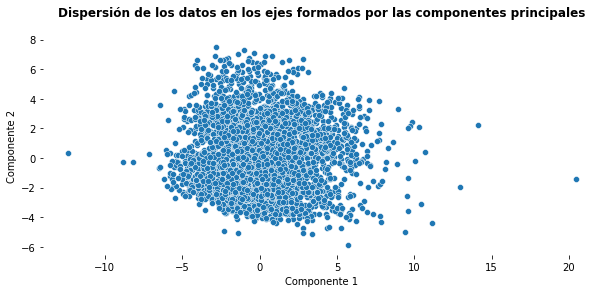


La primer componente explica el  7.13  % de la variación 

La segunda componente explica el  5.32  % de la variación


In [14]:
# visualización del set de datos en sus dos ejes de mayor variación
from sklearn.decomposition import PCA

# en analisis previos encontramos que el tipo de edulcorante generaba alrededor del 80% de la variabilidad
# de los datos. Decidimos sacar esta variable porque aes probable que mucha de esa variabilidad se genere
# porque cada categoría se transforma en un número (para poder realizar el análisis) por lo que la diferencia
# en números entre las categorías carece de sentido
df_clust        = df_clust.drop('edulc', axis=1) 

df_pca          = df_clust.copy()
pca             = PCA(n_components=2, random_state=33)
df_clust_pca    = pca.fit_transform(df_pca)

pca_comp_1      = df_clust_pca[:,0]    # distribución en la componente principal 1
pca_comp_2      = df_clust_pca[:, 1]   # distribución en la componente principal 2
plt.figure(figsize=(10,4))
sns.scatterplot(x=pca_comp_1, y=pca_comp_2)
plt.title('Dispersión de los datos en los ejes formados por las componentes principales\n', fontweight='bold')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
sns.despine(left=True, bottom=True)
plt.show()
print('\nLa primer componente explica el ', round(pca.explained_variance_ratio_[0]*100, 2), ' % de la variación',
      '\n\nLa segunda componente explica el ', round(pca.explained_variance_ratio_[1]*100, 2), ' % de la variación')

In [15]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        if coeff[i,0] > 0.1 or coeff[i,1] > 0.1 or coeff[i,0] < -0.1 or coeff[i,1] < -0.1: 
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, 'var '+str(i+1), color = 'black', 
                         ha = 'center', va = 'center', fontsize=15)
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', 
                         ha = 'center', va = 'center', fontsize=15)
    plt.xlim(xs.min()*scalex, xs.max()*scalex)
    plt.ylim(ys.min()*scaley, ys.max()*scaley)
    plt.xlabel("Componente {}".format(1))
    plt.ylabel("Componente {}".format(2))
    plt.grid()

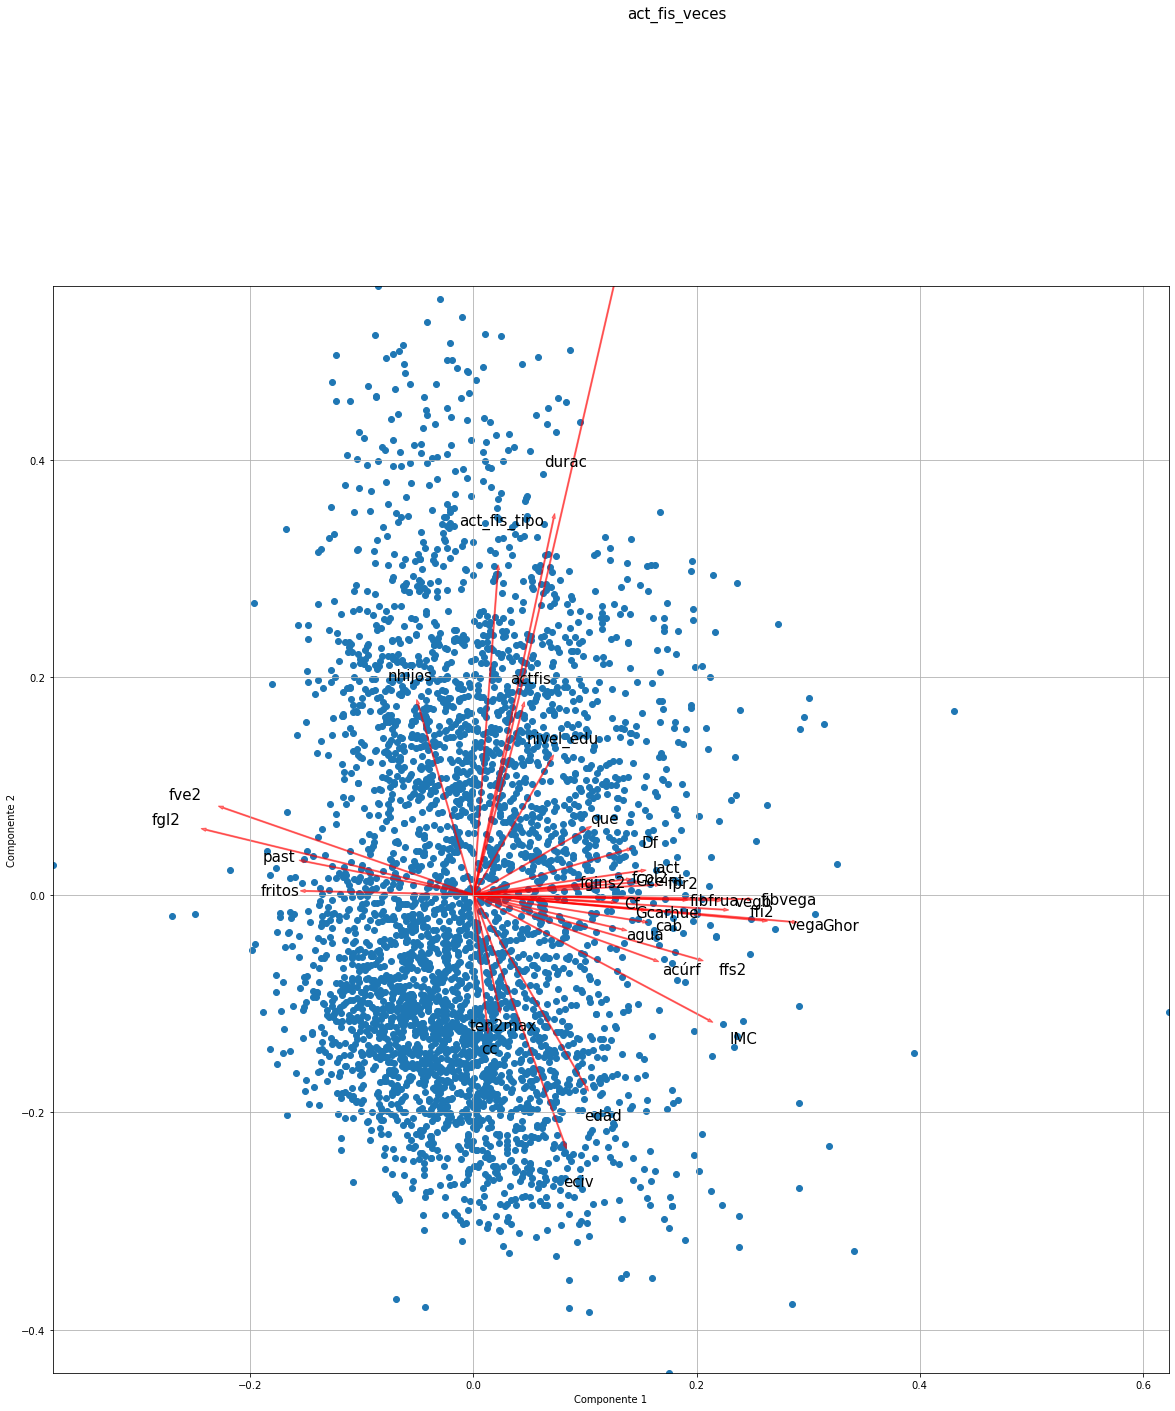

In [16]:
plt.figure(figsize=(20, 20))
myplot(df_clust_pca,np.transpose(pca.components_), df_clust.columns)

Se observa que la variable que explica la mayor variabilidad de los datos es "act_fis_veces" (cantidad de veces que realiza actividad física).
Las variables "durac" (duración de la actividad física), "act_fis_tipo" (tipo de actividad física) y "actfis" (si realiza actividad física) varían en forma similar a "act_fis_tipo" aunque con menor magnitud.
La variable Gcarhue (alimentos a base de huevos y carne) varía en forma similar al consumo de vegetales y hortalizas ("vegaGhor").
Se observa una variación similar entre la variación de la tensión arterial máxima ("ten2max") y la circunferencia de cintura ("cc").
Se observa una variación similar entre el promedio de consumo de calorias diarias ("fve2") y el consumo de glúcidos ("fgl2") y pastas ("past"), mostrando una elevada relación entre estas variables.

### t-SNE

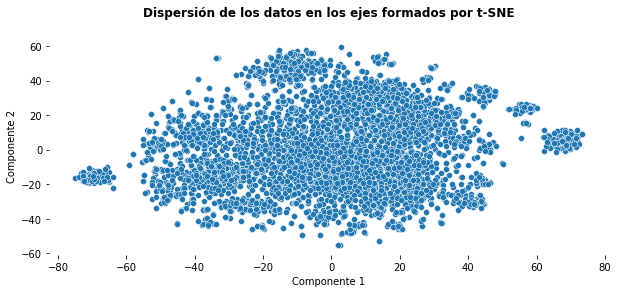

In [17]:
from sklearn.manifold import TSNE

df_tsne         = df_clust.copy()
tsne            = TSNE(n_components=2, random_state=33)
tsne.fit(df_tsne)
df_clust_tsne  = TSNE(n_components=2).fit_transform(df_tsne)
tsne_comp_1     = df_clust_tsne[:,0]
tsne_comp_2     = df_clust_tsne[:, 1]
plt.figure(figsize=(10,4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2)
plt.title('Dispersión de los datos en los ejes formados por t-SNE\n', fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
sns.despine(left=True, bottom=True)
plt.show()

## Clustering: k-means

Text(0.5, 1.0, 'Inercia vs número de clusters\n')

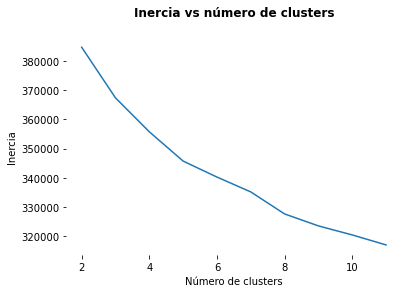

In [18]:
from sklearn.cluster  import KMeans
from sklearn          import decomposition

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+1, random_state=11).fit(df_clust).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
sns.despine(left=True, bottom=True)
plt.xlabel('Número de clusters')
plt.ylabel("Inercia")
plt.title("Inercia vs número de clusters\n", fontweight='bold')

A partir del método del codo, la división en 5 clusters sería la óptima (se observa una reducción más pronuciada en la inercia con este parámetro). En las próximas celdas vamos a analizar el coeficiente de silueta para confirmar esta observación.

In [19]:
# generamos una función para graficar la silueta junto con la distribución de las
# etiquetas de los diferentes clusters en espacio PCA y t-SNE
def silueta_graph(data_pca, data_tsne, num_clusters = True, savefig = False):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt
    import numpy as np
    if num_clusters == True:
        range_n_clusters = [2,3, 4, 5, 6]
    else:
        range_n_clusters = [i for i in range(2, num_clusters+1)]
    sse = {}
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data_pca)
        sse[n_clusters] = clusterer.inertia_
        silhouette_avg = silhouette_score(data_pca, cluster_labels)
        print("Para n_clusters =", n_clusters,
              "El coeficiente de silueta es: ", round(silhouette_avg, 2))
        sample_silhouette_values = silhouette_samples(data_pca, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Etiquetado de los gráficos de silueta con sus números de cluster al medio
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Cómputo del nuevo new_y_lower para el próximo gráfico
            y_lower = y_upper + 10  

            ax1.set_title("Visualizacion de los datos.")
            ax1.set_xlabel("espacio de la primera caracteristica")
            ax1.set_ylabel("espacio de la segunda caracteristica")

            # Línea vertical del promedio del score de silueta de todos los valores
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


            # Clusters formados en espacio PCA
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(data_pca[:, 0], data_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            # Etiquetado de clusters
            centers = clusterer.cluster_centers_
            # Generación de círculos blancos alrededor del centro de los clusters
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            ax2.set_title("Visualizacion de los datos en espacio PCA.")
            ax2.set_xlabel("espacio de la primera caracteristica")
            ax2.set_ylabel("espacio de la segunda caracteristica")

            plt.suptitle(("Analisis de silueta para Kmedias "
                          "con n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')
            
            # Clusters formados en espacio t-SNE
            clusterer_tsne = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels_tsne = clusterer_tsne.fit_predict(data_tsne)
            colors_tsne = cm.nipy_spectral(cluster_labels_tsne.astype(float) / n_clusters)
            ax3.scatter(data_tsne[:, 0], data_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            # Etiquetado de clusters
            centers_tsne = clusterer_tsne.cluster_centers_
            # Generación de círculos blancos alrededor del centro de los clusters
            ax3.scatter(centers_tsne[:, 0], centers_tsne[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centers_tsne):
                ax3.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            ax3.set_title("Visualizacion de los datos en espacio t-SNE.")
            ax3.set_xlabel("espacio de la primera caracteristica")
            ax3.set_ylabel("espacio de la segunda caracteristica")

            plt.suptitle(("Analisis de silueta para Kmedias "
                          "con n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')
            if savefig == True:
                plt.savefig("kmeans_%d" % n_clusters, dpi=300)
    plt.show()

Para n_clusters = 2 El coeficiente de silueta es:  0.34
Para n_clusters = 3 El coeficiente de silueta es:  0.38
Para n_clusters = 4 El coeficiente de silueta es:  0.37
Para n_clusters = 5 El coeficiente de silueta es:  0.36
Para n_clusters = 6 El coeficiente de silueta es:  0.34
Para n_clusters = 7 El coeficiente de silueta es:  0.35
Para n_clusters = 8 El coeficiente de silueta es:  0.35
Para n_clusters = 9 El coeficiente de silueta es:  0.33
Para n_clusters = 10 El coeficiente de silueta es:  0.34


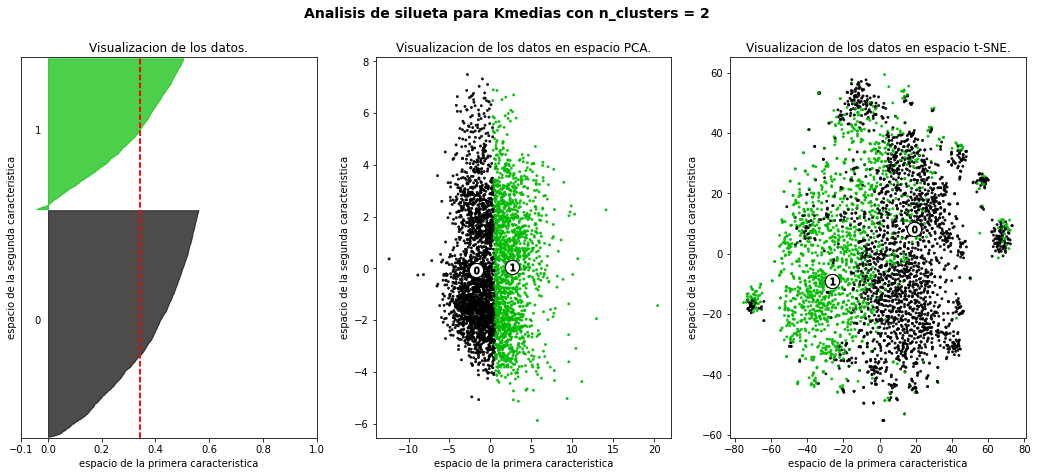

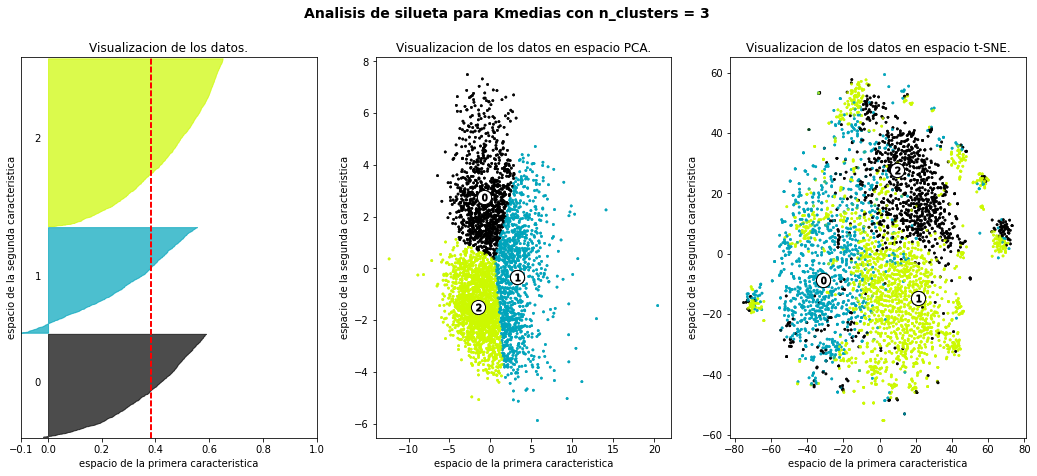

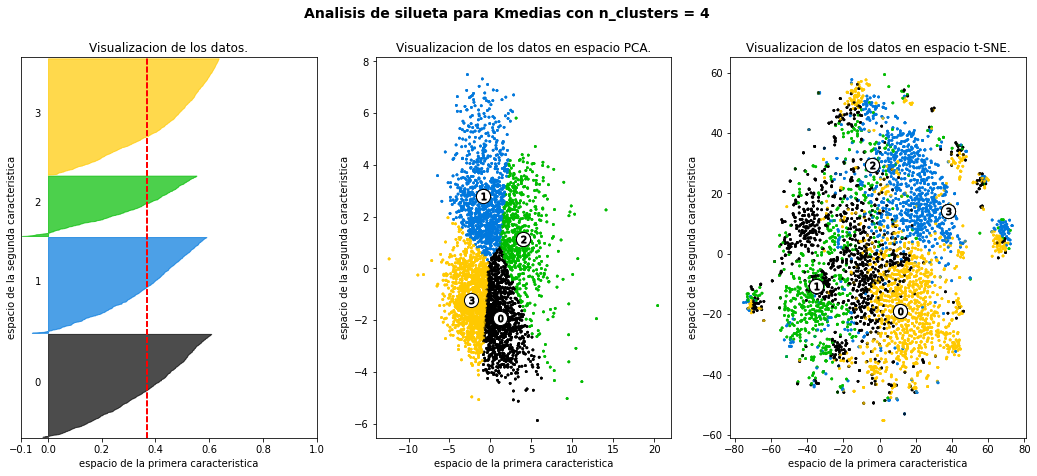

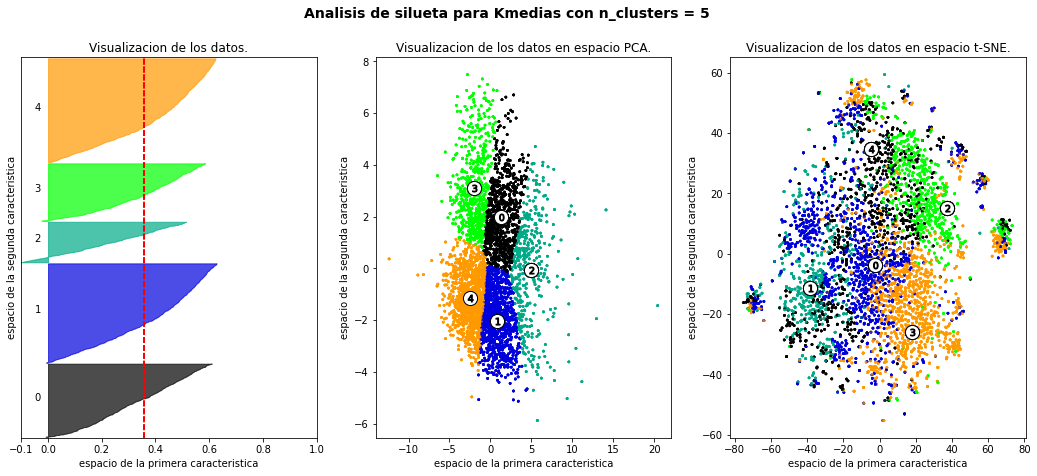

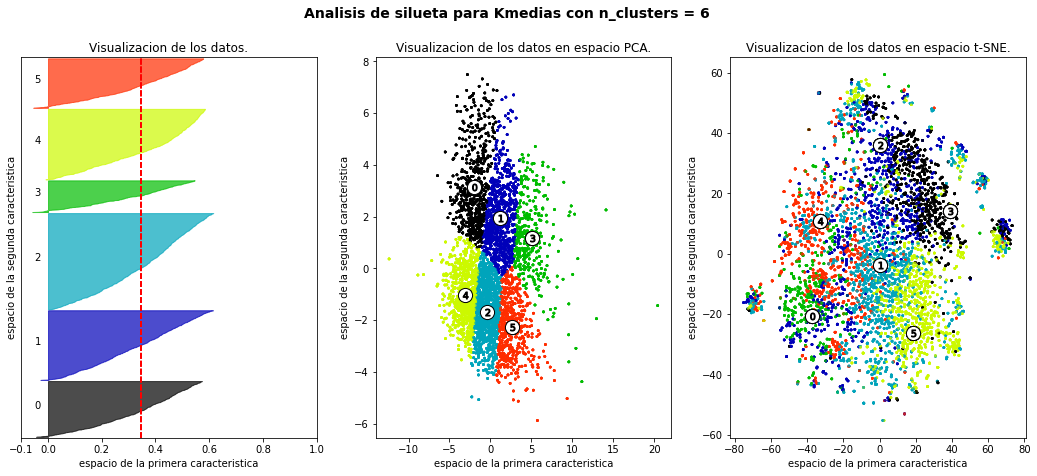

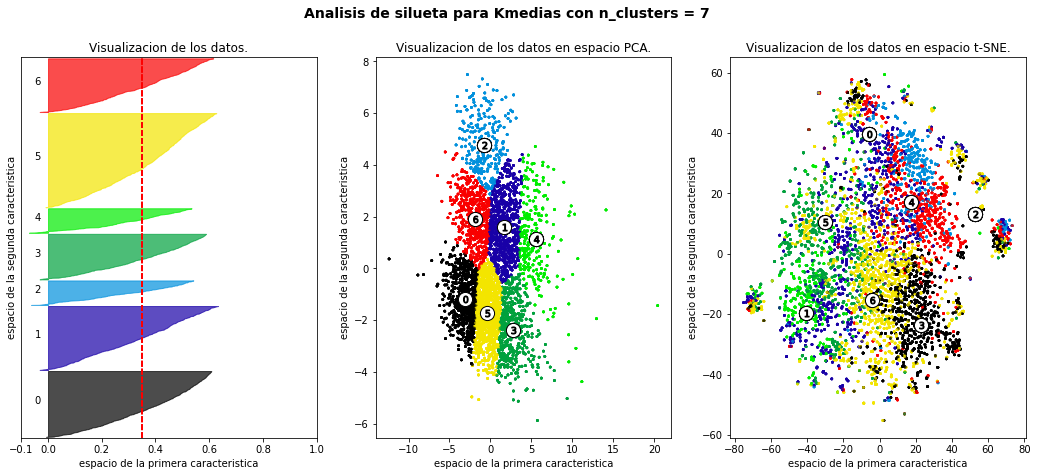

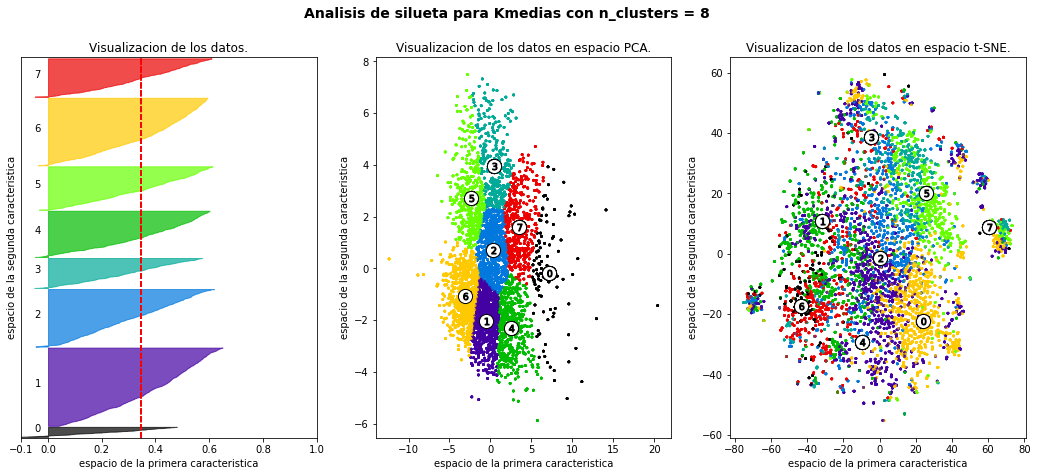

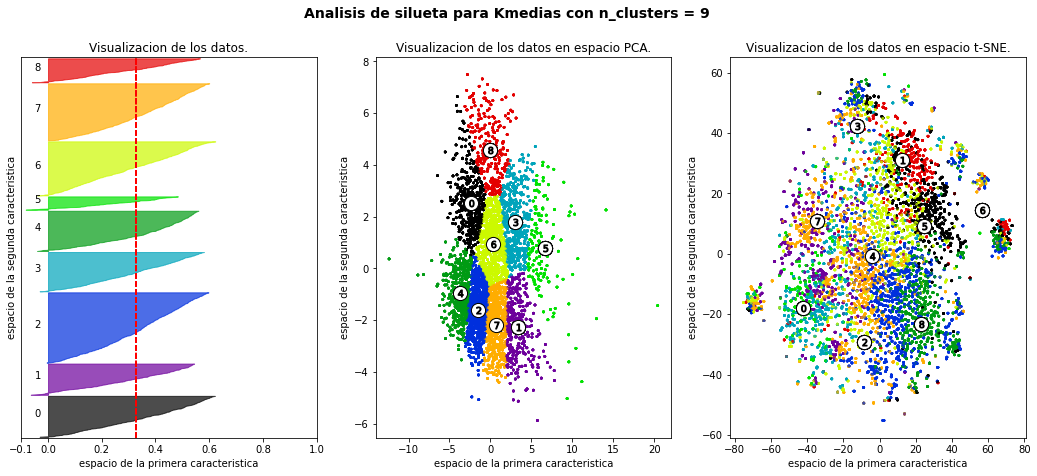

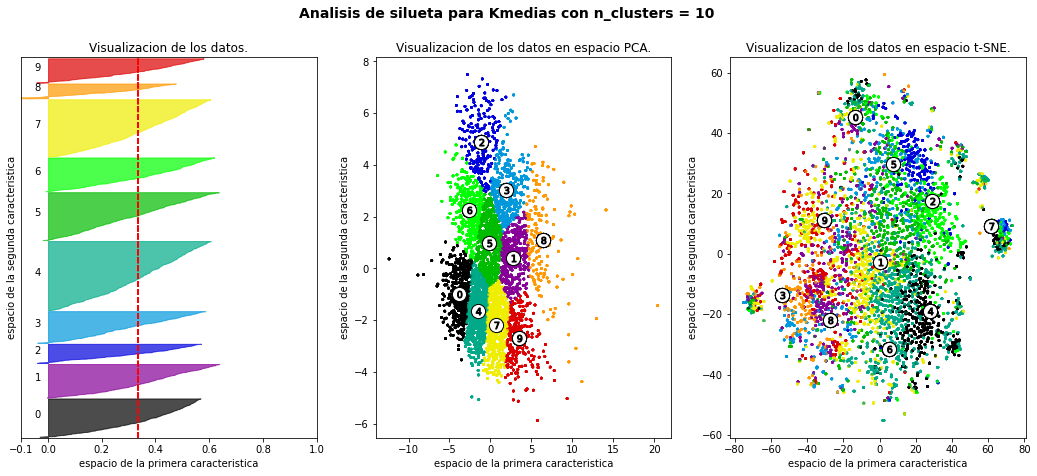

In [20]:
silueta_graph(df_clust_pca, df_clust_tsne, num_clusters=10)

No se observan grandes diferencias en el valor de silueta promedio en las distintas divisiones (0.33 a 0.38). A su vez, todas las particiones generadas en las divisiones superan el valor de silueta promedio. No encontramos una división con clusters totalmente balanceados. La divisíon en 5 clusters genera clusters moderadamente balanceados con algunos valores negativos en un único cluster (valores probablemente mal asignados al cluster). A partir de esta observación y el método del codo realizado en la celda anterior, decidimos quedarnos con la división de 5 clusters.

In [21]:
# Número de clusters buscado
n_clust = 5

model = KMeans(n_clusters=n_clust, random_state=11)
model.fit(df_clust)

# Recuperacion de etiquetas
km_clusters = model.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', int(model.inertia_))

Suma de los cuadrados de las distancias al cluster / Inertia:  340278


In [22]:
df_clust_copy = df_clust.copy()

In [23]:
def heatmap_table(data, clusters, figsize=(3, 10), range=0.8):
    pd.set_option('display.max_rows', data.shape[0]+1)
    plt.figure(figsize=figsize)
    variables_graph = data.groupby([clusters]).median().round(2)
    table = {}
    for i in variables_graph:
        v_range = variables_graph[i].max() - variables_graph[i].min()
        if isinstance(v_range, float):
            if v_range >= range:
                table[i] = variables_graph[i]
    table = pd.DataFrame(table).transpose()
    sns.heatmap(table, 
                annot=True, cbar=False, cmap='coolwarm', annot_kws={"size": 8}, 
               vmin=-0.3, vmax=0.4)
    plt.title('Características de los clusters según las variables analizadas\n', fontsize=15)

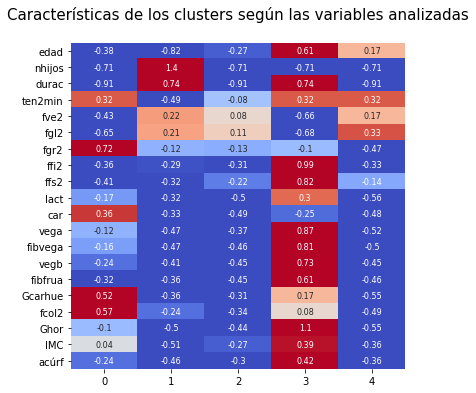

In [24]:
heatmap_table(df_clust, km_clusters, figsize=(6, 6))

Teniendo en cuenta la elevada correlación entre la edad y la obesidad observada en los tp anteriores, comenzamos el análisis de las características de los clusters formados teniendo en cuenta clusters con personas de edad similar.
Los clusters 0, 1 y 2 agrupan a personas jóvenes y el cluster 1 realiza mayor cantidad de actividad física ("durac") observándose a su vez un menor índice de masa corporal ("IMC") y tensión arterial mínima ("ten2min") en este cluster. Al comparar los clusters 0 y 2, se observa que ambos realizan poca actividad física y el cluster 2 presenta mayores niveles de presión arterial mínima ("ten2min"). A pesar que el cluster 2 consume mayor cantidad de calorías ("fve2") que el cluster 0, este grupo posee menor índice de masa corporal. Esta obserrvación podría explicarse a partir del mayor consumo de carnes rojas ("car") grasas ("fgr2") y colesterol ("fcol2") que tiene el cluster 0.
El cluster 3 agrupa a las personas de mayor edad. Este grupo presenta el mayor índice de masa corporal a pesar de ser el grupo con mayor actividad física (junto con el cluster 1) y tener el menor consumo de calorías ("fve2") y glúcidos ("fgl2"), así como el grupo con mayor cantidad de consumo de hortalizas ("Ghor"), vegetales ("vega", "fibvega" y "vegb"), fibras ("ffi2" y "ffs2"). Estas observaciones ponen en manifiesto la gran influencia de la edad en la generación de obesidad.

## Gaussian mixture

In [25]:
# Calculamos el criterio de información bayesiana para estimar el mejor número de componentes de
# la mezcla gaussiana
import itertools
from sklearn import mixture
from scipy import linalg
import matplotlib as mpl
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
X = df_clust_tsne
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state=11)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['limegreen', 'orchid', 'aqua',
                                              'magenta','violet', 'deeppink',
                                             'crimson', 'fuchsia', 'blue'])
clf = best_gmm
bars = []

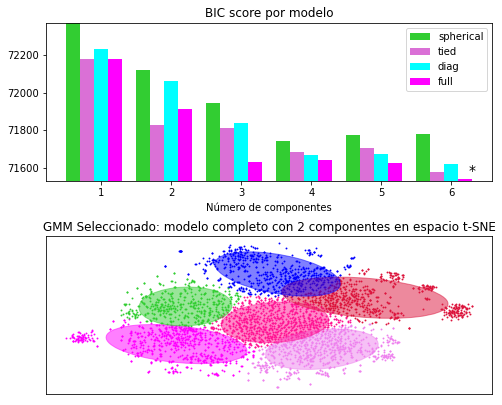

In [26]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score por modelo')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('GMM Seleccionado: modelo completo con 2 componentes en espacio t-SNE')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [27]:
model = mixture.GaussianMixture(n_components=6, covariance_type='full', random_state=11)
model.fit(df_clust)

g_clusters = model.predict(df_clust)

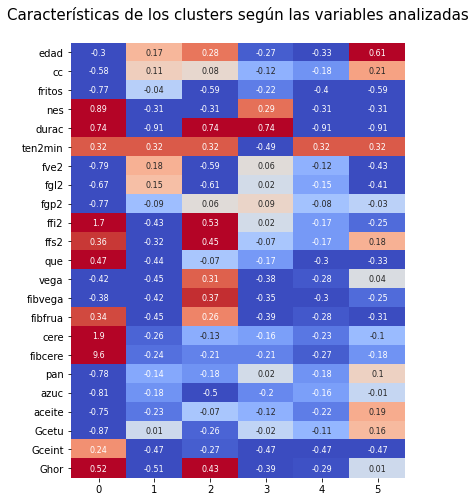

In [28]:
heatmap_table(df_clust, g_clusters, figsize=(6, 8), range=0.7)

Los clusters 0, 3 y 4 presentan edad similar. El cluster 0 presenta la menor circunferencia de cintura ("cc") y a su vez el grupo que realiza la mayor actividad física (junto con los clusters 0 y 3) presentando hábitos alimentarios más saludables ya que es el grupo con mayor consumo de fibras ("ffi2" y "ffs2") hortalizas ("Ghor") y menor consumo de azucar ("azuc"), aceite ("aceite"), pan ("pan"), productos fritos ("fritos") y calorías ("fve2"). No existen grandes diferencias entre los clusters 3 y 4, a excepción que el cluster 3 realiza más actividad física ("durac") y presenta menores valores de presión arterial mínima ("ten2min").
De forma similar a lo observado en el análisis de kmeans, el cluster de mayor edad (cluster 5) presenta los mayores valores de circunferencia de cintura ("cc"). El cluster 2 es el segundo con mayores valores de edad pero presenta valores similares de circuferencia de cintura que el cluster 1. Uno de los factores que puede influir en esta diferencia es que el cluster 2 realiza mayor actividad física que el cluster 1 y consume menores cantidad de calorías. Además este cluster presenta hábitos alimentarios más saludables, con mayor consumo de fibras, vegetales y hortalizas.